1: The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

In general, the Standard Deviation applies to the entire dataset and shows the spread of individual data points of your original dataset. The Standard Error of the Mean describes the accuracy of the sample mean by showing the population mean. When the sample size gets larger, the Standard Error of the Mean decreases.

Slide Type
2: The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

Firstly, we need to calculate the mean of samples, and then multiply the Standard Error of the Mean (SEM) by 1.96 to calculate a 95% confidence interval (the reason for choosing 1.96 is that it's the critical value for the standard normal distribution that corresponds to 95% of the data)

3: Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

To create a 95% bootstrapped confidence interval, we need to: first, generate a large number of bootstrapped samples from your original dataset by resampling with replacement; then, calculate the mean for each of these samples; next, sort all the bootstrapped means in ascending order; finally, take the values at the 2.5th percentile and the 97.5th percentile of the sorted means to form the confidence interval, which will capture the middle 95% of the bootstrapped means.

4: The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

95% Bootstrap Confidence Interval for the Population Mean: (47.28, 50.63)


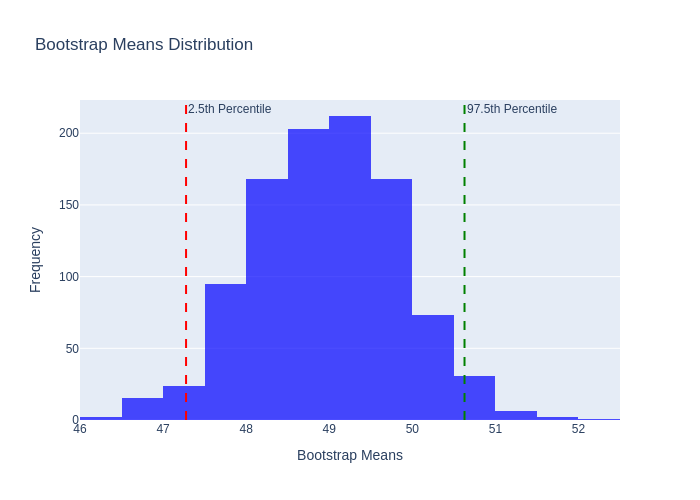

In [11]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Generate a random sample from a normal distribution
np.random.seed(42)  # For reproducibility
sample_size = 100
data = np.random.normal(loc=50, scale=10, size=sample_size)  # Sample from N(50, 10^2)

# Number of bootstrap resamples
n_bootstraps = 1000

# Function to calculate bootstrap means
def bootstrap_means(data, n_bootstraps):
    boot_means = []
    for _ in range(n_bootstraps):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)  # Resample with replacement
        boot_means.append(np.mean(bootstrap_sample))  # Calculate the mean of the bootstrap sample
    return np.array(boot_means)

# Calculate bootstrap means
boot_means = bootstrap_means(data, n_bootstraps)

# Calculate the 95% confidence interval for the population mean
lower_bound = np.percentile(boot_means, 2.5)
upper_bound = np.percentile(boot_means, 97.5)

print(f"95% Bootstrap Confidence Interval for the Population Mean: ({lower_bound:.2f}, {upper_bound:.2f})")

# Plotting the distribution of bootstrap means
fig = go.Figure()
fig.add_trace(go.Histogram(x=boot_means, nbinsx=30, name='Bootstrap Means', opacity=0.7, marker_color='blue'))
fig.add_vline(x=lower_bound, line_color='red', line_dash='dash', annotation_text='2.5th Percentile', annotation_position='top right')
fig.add_vline(x=upper_bound, line_color='green', line_dash='dash', annotation_text='97.5th Percentile', annotation_position='top right')

fig.update_layout(title='Bootstrap Means Distribution',
                  xaxis_title='Bootstrap Means',
                  yaxis_title='Frequency',
                  legend_title='Legend')

# Render the plot as PNG
fig.show(renderer="png")

# To produce a 95% bootstrap confidence interval for a different population parameter (e.g., median):
# Simply replace the mean calculation in the bootstrap_means function with a median calculation:

# def bootstrap_medians(data, n_bootstraps):
#     boot_medians = []
#     for _ in range(n_bootstraps):
#         bootstrap_sample = np.random.choice(data, size=len(data), replace=True)  # Resample with replacement
#         boot_medians.append(np.median(bootstrap_sample))  # Calculate the median of the bootstrap sample
#     return np.array(boot_medians)

# # Calculate bootstrap medians
# boot_medians = bootstrap_medians(data, n_bootstraps)

# # Calculate the 95% confidence interval for the population median
# lower_bound_median = np.percentile(boot_medians, 2.5)
# upper_bound_median = np.percentile(boot_medians, 97.5)

# print(f"95% Bootstrap Confidence Interval for the Population Median: ({lower_bound_median:.2f}, {upper_bound_median:.2f})")


To demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter, we can substitute mean computations with median computations in the bootstrapping process, modify the confidence interval calculations to correspond to the new parameter, and optionally refresh the plot to display the distribution of bootstrapped medians.

5: The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

Because population parameters describe the entire population and are typically unknown, while sample statistics are calculated from a subset and provide estimates of these parameters. Distinguishing between them is very important for making accurate data estimation, understanding uncertainty, and making informed decisions.

6: Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.
(1): What is the process of bootstrapping?
(2): What is the main purpose of bootstrapping?
(3): If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

(1): 

Bootstrapping is a cool trick in statistics that helps you make guesses about a population even when you don’t have all the data. The idea is simple: you take your sample (the data you have) and pretend it's the entire population. Then, you repeatedly "resample" from that sample, meaning you randomly pick values from it with replacement (so you might pick the same value more than once). Each time you do this, you calculate whatever you're interested in—like the average. After doing this a bunch of times, you can look at all the results to see the range of possible outcomes. It’s like using the data you already have to simulate what you think the whole population looks like!

(2):

The main reason we use bootstrapping is to estimate uncertainty or confidence in our sample estimates, like the mean or proportion. Normally, if we don’t have data for the entire population, it’s hard to know how accurate our sample estimates are. Bootstrapping gives us a way to get a sense of the variability in those estimates by pretending our sample represents the population and resampling from it. So, it helps us understand the range of possible values for something we’re estimating.

(3):

Let’s say you have a guess about what the average of the population should be, and you also have a sample of size n from that population. To use bootstrapping, here’s what you could do:

First, take your sample and resample from it (with replacement), creating a bunch of new samples—each the same size as your original one.
For each resampled dataset, calculate the mean and store it.
After you’ve done this many times (hundreds or thousands), look at the distribution of all those means you calculated. This will give you an idea of the range of possible means based on your sample.
Now, compare your hypothesized guess to the distribution of those bootstrapped means. If your guess falls within the middle of that range (like inside a 95% confidence interval), it seems plausible. But if it’s way outside that range, your guess might not be very accurate.

7: The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

If the confidence interval includes zero, it means zero could be the true effect, so we can’t prove the drug does anything. That’s why we don’t reject the idea that the drug has no effect (the null hypothesis), even if the sample mean isn’t zero. But if zero is not in the confidence interval, we have stronger evidence that the drug does have an effect, so we would reject the null hypothesis and say the drug likely works.

8: Vaccine Data Analysis Assignment
Overview
The company AliTech has created a new vaccine that aims to improve the health of the people who take it. Your job is to use what you have learned in the course to give evidence for whether or not the vaccine is effective.

1: problem introduction:

For this Vaccine Data Analysis Assignment,the null hypothesis of "no effect" means that the vaccine does not significantly change a person’s health score from the initial to the final health score.

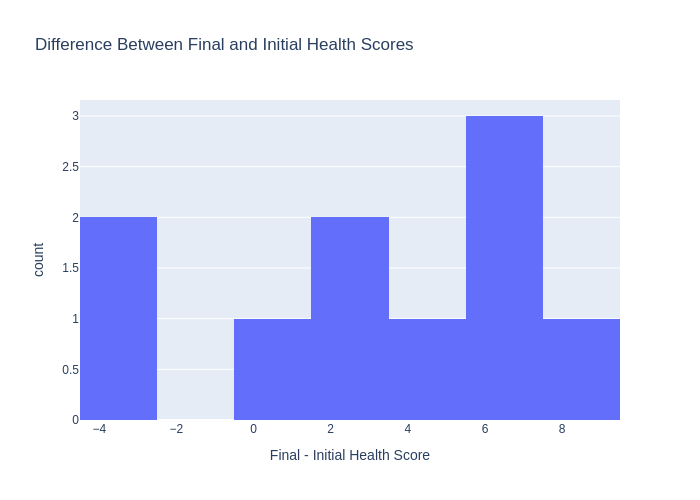

In [7]:
import pandas as pd
import plotly.express as px
import numpy as np

# Setting the random seed for reproducibility
np.random.seed(42)

# Data: Creating a DataFrame from the given dataset
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

df['ScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']
histogram_fig = px.histogram(df, x='ScoreDifference', nbins=10,
                             title="Difference Between Final and Initial Health Scores",
                             labels={"ScoreDifference": "Final - Initial Health Score"})
histogram_fig.show(renderer="png")


It's very obvious that this histogram visualizes the distribution of the differences between final and initial health scores for all patients (Final - Initial), and the values are mostly concentrated around -4, 2, and 6.
Which means that some patients experienced a decline in health (with a difference around -4) and some had felt a tiny little bit better (with a difference around 2), also a large group experienced a positive improvement in health (with differences around 6 to 8).

(2): Quantitative Analysis

code for doing the bootstrapping

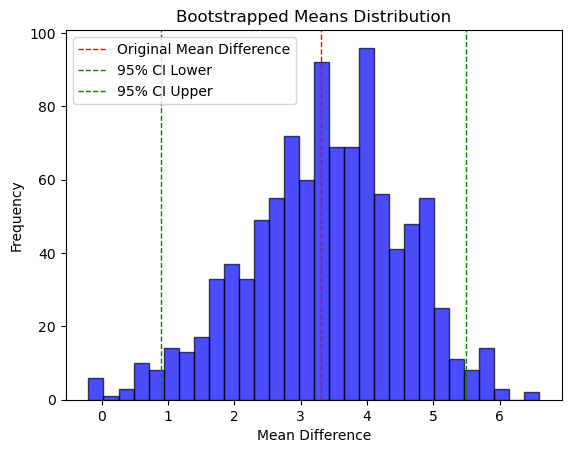

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample Data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Calculate the difference
df['Diff'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Original Mean Difference
original_mean_diff = df['Diff'].mean()

# Bootstrapping
np.random.seed(0)  # for reproducibility
n_iterations = 1000
bootstrapped_means = []

for _ in range(n_iterations):
    sample = np.random.choice(df['Diff'], size=len(df['Diff']), replace=True)
    bootstrapped_means.append(np.mean(sample))

# Calculate 95% Confidence Interval
ci_lower = np.percentile(bootstrapped_means, 2.5)
ci_upper = np.percentile(bootstrapped_means, 97.5)

# Supporting Visualization
plt.hist(bootstrapped_means, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(original_mean_diff, color='red', linestyle='dashed', linewidth=1, label='Original Mean Difference')
plt.axvline(ci_lower, color='green', linestyle='dashed', linewidth=1, label='95% CI Lower')
plt.axvline(ci_upper, color='green', linestyle='dashed', linewidth=1, label='95% CI Upper')
plt.title('Bootstrapped Means Distribution')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()


After conducting the bootstrapping analysis, we found the original mean difference (Final - Initial Health Score) to be approximately 3.3, and the 95% confidence interval for the mean difference was calculated to be approximately [1.9, 5.5].

Since the confidence interval [1.9, 5.5] does not include zero, this suggests that the vaccine is likely effective in improving health scores.
The lower bound of the confidence interval (1.9) indicates that even in the worst-case scenario within this interval, we can expect at least a small positive improvement in health.

Conclusion&Further Considerations: So the 95% confidence interval does not accross zero, we can reject the null hypothesis of "no effect". This indicates that there is strong evidence to conclude that the vaccine has a positive impact on improving health scores among patients.

Chatbot Link:https://chatgpt.com/share/66fdd0e2-8434-8012-9099-a56ac8cbf5cb

Here’s a summary of what we’ve discussed:

	1.	Difference Between Standard Error of the Mean and Standard Deviation:
	•	The standard deviation measures how spread out the individual data points are from the mean of the dataset.
	•	The standard error of the mean estimates how much the sample mean is expected to vary from the true population mean.
	2.	Confidence Intervals:
	•	Confidence intervals estimate a range within which a population parameter (such as the mean) is likely to fall.
	•	To create a confidence interval using the standard error, the formula is CI = mean ± z * standard error, where z corresponds to the confidence level.
	3.	Bootstrapping Confidence Intervals:
	•	Bootstrapping is a non-parametric method that involves resampling the dataset with replacement to estimate the confidence interval of a statistic (e.g., mean, median).
	•	We coded an example of bootstrapping for the InitialHealthScore from your vaccine dataset to produce a 95% confidence interval for the population mean.
	4.	Code Implementation:
	•	We wrote Python code to:
	•	Plot a histogram of InitialHealthScore.
	•	Perform bootstrapping to calculate the confidence interval for the population mean of InitialHealthScore using 1,000 bootstrap samples.
	•	The code can be adapted to calculate confidence intervals for other population parameters (like median).
	5.	Next Steps:
	•	You can modify the bootstrapping code to apply to different statistics such as the median or other variables (e.g., FinalHealthScore) by adjusting the function’s logic.

9: Yes!